Part I: Data quality and preparation.

In [20]:
#Import libraries and dataset.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

car_data = pd.read_excel("/Users/jocelynroman/Documents/MaestriaData/Modulo3/Jocelyn-Case/car_evaluation.xlsx")

In [21]:
#View first 5 rows.
car_data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [22]:
#View last 5 rows.
car_data.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [23]:
#Check dataset dimension.
car_data.shape

(1727, 7)

In [24]:
#Check columns of the dataset.
car_data.columns

Index(['vhigh', 'vhigh.1', 2, '2.1', 'small', 'low', 'unacc'], dtype='object')

According to the documentation: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set.

The meaning of each columns is:
* vhigh: buying price
* vhigh.1: maintenance cost
* 2: number of doors
* 2.1: number of persons
* small: lug_boot
* low: safety
* unacc: decision


In [25]:
#Check types for each column.
car_data.dtypes

vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object

In [26]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [27]:
car_data.count()

vhigh      1727
vhigh.1    1727
2          1727
2.1        1727
small      1727
low        1727
unacc      1727
dtype: int64

In [28]:
type(car_data)

pandas.core.frame.DataFrame

In [29]:
car_data.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [30]:
#Rename columns.
car_data.columns=['buying', 'maint', 'doors', 'persons','lug_boot', 'safety' ,'class']
print(car_data)

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    med  unacc
1     vhigh  vhigh      2       2    small   high  unacc
2     vhigh  vhigh      2       2      med    low  unacc
3     vhigh  vhigh      2       2      med    med  unacc
4     vhigh  vhigh      2       2      med   high  unacc
...     ...    ...    ...     ...      ...    ...    ...
1722    low    low  5more    more      med    med   good
1723    low    low  5more    more      med   high  vgood
1724    low    low  5more    more      big    low  unacc
1725    low    low  5more    more      big    med   good
1726    low    low  5more    more      big   high  vgood

[1727 rows x 7 columns]


In [31]:
#Check nulls.
car_data.isnull()

,buying,maint,doors,persons,lug_boot,safety,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1722,False,False,False,False,False,False,False
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False


In [32]:
#Transform 5more to 5 in the doors column to be able to transform the data to number.
car_data['doors'] = car_data['doors'].replace({'5more': 5})

In [33]:
#Transform doors type into number.
car_data['doors'] = car_data['doors'].apply(pd.to_numeric, errors='coerce')
car_data.dtypes

buying      object
maint       object
doors        int64
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [34]:
#check missing values in variables
car_data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

array([[<Axes: title={'center': 'doors'}>]], dtype=object)

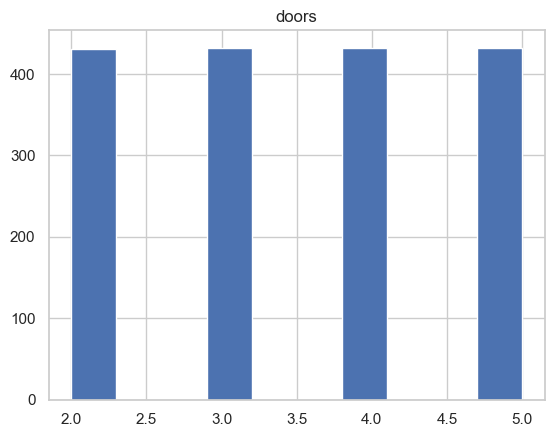

In [35]:
car_data.hist()

[Text(0, 0.5, '# of doors'), Text(0.5, 0, 'buying cost')]

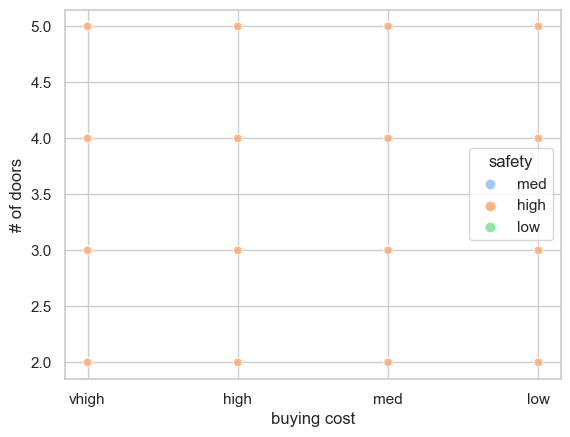

In [36]:
#Scatterplot for buying cost and doors based on safety
import seaborn

seaborn.set(style='whitegrid')

seaborn.scatterplot(x="buying",
                    y="doors",
                    hue="safety",
                    data=car_data, 
                    palette="pastel").set(ylabel="# of doors", xlabel="buying cost")

# It can be observed that regardless of the number of doors and the cost of purchase, people opt for a safe car.

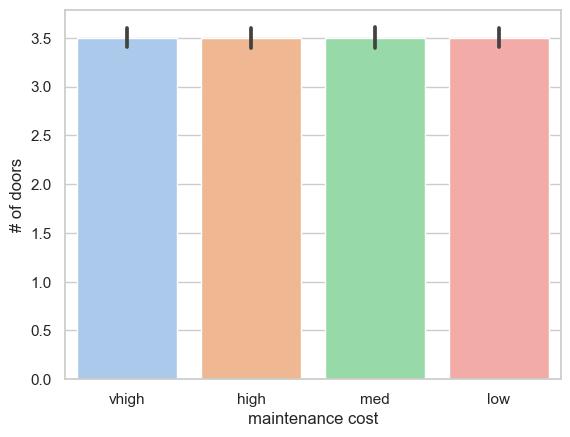

In [37]:
#Barplot
import seaborn
import matplotlib.pyplot as plt

seaborn.barplot(x="maint", y="doors", data=car_data, palette="pastel").set(ylabel="# of doors", xlabel="maintenance cost")
plt.show()

#Regardless of maintenance costs, cars with more doors are preferred.


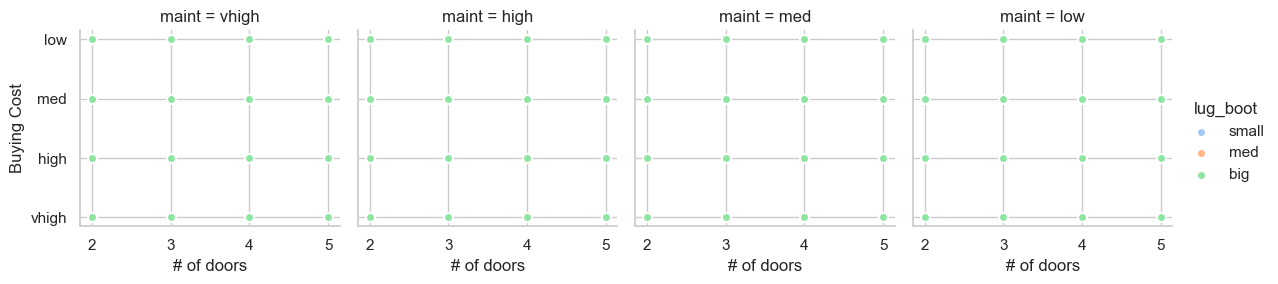

In [38]:
#Facet grid
import seaborn
import matplotlib.pyplot as plt

graph = seaborn.FacetGrid(car_data, col ="maint",  hue ="lug_boot", palette="pastel")

graph.map(plt.scatter, "doors", "buying", edgecolor ="w").add_legend()
graph.set(ylabel='Buying Cost', xlabel='# of doors')

plt.show()

# Cars with large trunks are preferred regardless of the number of doors.

[Text(0.5, 1.0, 'Maintenance & Buying Cost'),
 Text(0, 0.5, 'maintenance cost'),
 Text(0.5, 0, 'buying cost')]

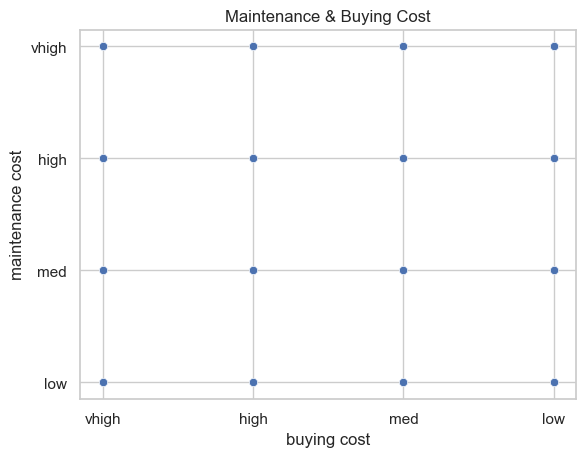

In [39]:
# Create a scatterplot
import seaborn
import matplotlib.pyplot as plt
seaborn.scatterplot(data=car_data, 
                    x="maint", 
                    y="buying").set(title='Maintenance & Buying Cost', ylabel="maintenance cost", xlabel="buying cost")
#Regardless of the purchase price, maintenance can vary and does not directly affect it, so there is no correlation.

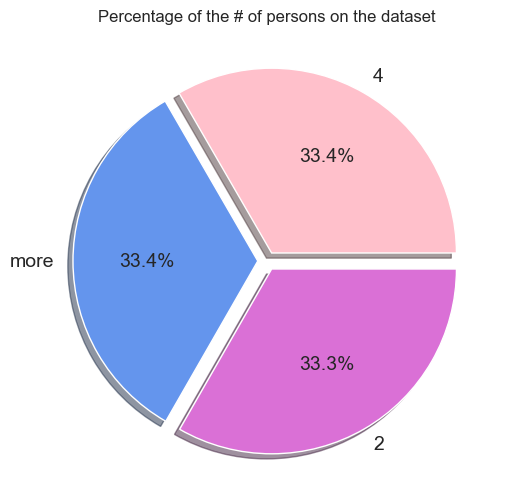

In [40]:
# Percentage of the # of persons on the dataset.
car_data['persons'].value_counts().plot.pie(
    explode=[0.05, 0.05,0.05], 
    autopct='%1.1f%%', 
    shadow=True, 
    figsize=(6,6), 
    textprops={'fontsize':14},
    colors=['pink', 'cornflowerblue','orchid'])
plt.title('Percentage of the # of persons on the dataset')
plt.axis('off') #hide the ylabel
plt.show()

# The dataset cars admit the same number of people with 2, 4 or more doors.

[Text(0.5, 1.0, 'Maintenance Cost'), Text(0, 0.5, 'maintenance')]

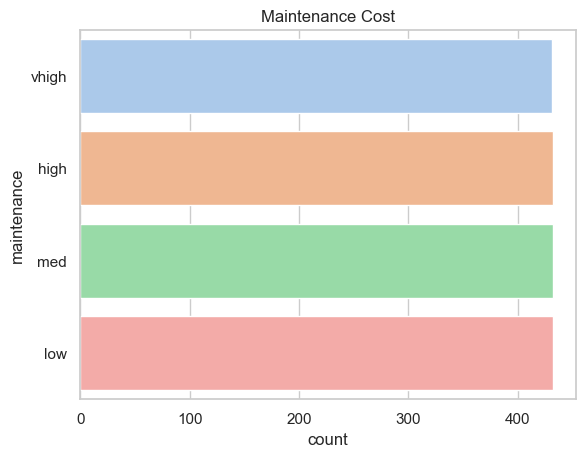

In [261]:
#Countplot for maintenance cost
seaborn.countplot(y = car_data["maint"], palette='pastel').set(title='Maintenance Cost', ylabel="maintenance")
#Existe la misma cantidad de carros por mantenimiento

Conclusions

Exploratory data analysis is a very important step when working with datasets. With them you can identify atypical cases, duplicate data, null data or missings. A large percentage of time must be spent on data wrangling in order to clean and transform the data and review its structure. It is important to have the context of the data to be worked on, either by including a person in the team who has the context or by understanding the topics and terms used in that context. After this, visualizations can be made to conclude important data that are reflected in the graphs and that can help the objective of analyzing the data.